In [174]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [99]:
df = pd.read_csv("../python/project_group work/books.csv", index_col="bookID")

In [100]:
df

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books


In [101]:
df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [102]:
df = df.rename(columns= {"  num_pages": "num_pages"})

In [103]:
df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher'],
      dtype='object')

In [104]:
cols_adjust = df.columns.tolist()
cols_adjust

['title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher']

In [105]:
cols_adjust = cols_adjust[0:2] + cols_adjust[3:-1] + cols_adjust[2:3]

In [106]:
cols_adjust

['title',
 'authors',
 'isbn',
 'isbn13',
 'language_code',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'average_rating']

In [107]:
df = df[cols_adjust]
df

,title,authors,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,average_rating
bookID,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,4.57
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,4.49
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,0439554896,9780439554893,eng,352,6333,244,11/1/2003,4.42
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,4.56
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,4.78
...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,1560254416,9781560254416,eng,512,156,20,12/21/2004,4.06
45633,You Bright and Risen Angels,William T. Vollmann,0140110879,9780140110876,eng,635,783,56,12/1/1988,4.08
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,0140131965,9780140131963,eng,415,820,95,8/1/1993,3.96


In [108]:
df.average_rating.describe()

count    11127.000000
mean         3.933631
std          0.352445
min          0.000000
25%          3.770000
50%          3.960000
75%          4.135000
max          5.000000
Name: average_rating, dtype: float64

In [109]:
df.average_rating.describe().round(1)

count    11127.0
mean         3.9
std          0.4
min          0.0
25%          3.8
50%          4.0
75%          4.1
max          5.0
Name: average_rating, dtype: float64

In [110]:
df.average_rating.head(5)

bookID
1    4.57
2    4.49
4    4.42
5    4.56
8    4.78
Name: average_rating, dtype: float64

In [111]:
df["average_rating"].describe()

count    11127.000000
mean         3.933631
std          0.352445
min          0.000000
25%          3.770000
50%          3.960000
75%          4.135000
max          5.000000
Name: average_rating, dtype: float64

In [112]:
df["average_rating"]

bookID
1        4.57
2        4.49
4        4.42
5        4.56
8        4.78
         ... 
45631    4.06
45633    4.08
45634    3.96
45639    3.72
45641    3.91
Name: average_rating, Length: 11127, dtype: float64

In [113]:
df.average_rating.describe()

count    11127.000000
mean         3.933631
std          0.352445
min          0.000000
25%          3.770000
50%          3.960000
75%          4.135000
max          5.000000
Name: average_rating, dtype: float64

In [114]:
df.loc[:,'average_rating']

bookID
1        4.57
2        4.49
4        4.42
5        4.56
8        4.78
         ... 
45631    4.06
45633    4.08
45634    3.96
45639    3.72
45641    3.91
Name: average_rating, Length: 11127, dtype: float64

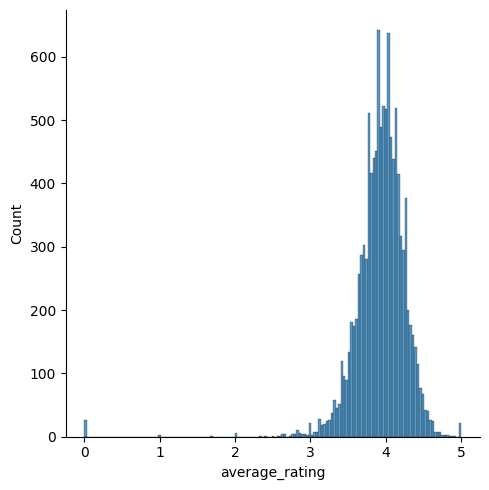

In [115]:
sns.displot(data=df,x="average_rating")

In [116]:
df.isna().sum()

title                 0
authors               0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
average_rating        0
dtype: int64

In [117]:
df.loc[df.isbn.isna(),:]

,title,authors,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,average_rating
bookID,,,,,,,,,,


In [118]:
df.language_code.describe()

count     11127
unique       27
top         eng
freq       8911
Name: language_code, dtype: object

In [119]:
set(df.language_code)

{'ale',
 'ara',
 'en-CA',
 'en-GB',
 'en-US',
 'eng',
 'enm',
 'fre',
 'ger',
 'gla',
 'glg',
 'grc',
 'ita',
 'jpn',
 'lat',
 'msa',
 'mul',
 'nl',
 'nor',
 'por',
 'rus',
 'spa',
 'srp',
 'swe',
 'tur',
 'wel',
 'zho'}

In [120]:
df.average_rating.describe()

count    11127.000000
mean         3.933631
std          0.352445
min          0.000000
25%          3.770000
50%          3.960000
75%          4.135000
max          5.000000
Name: average_rating, dtype: float64

In [121]:
plt.figure(figsize=(10,5))
plt.scatter(df.average_rating, df.isbn)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

Error in callback <function flush_figures at 0x14ab69820> (for post_execute):


KeyboardInterrupt: 

In [122]:
df

,title,authors,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,average_rating
bookID,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,4.57
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,4.49
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,0439554896,9780439554893,eng,352,6333,244,11/1/2003,4.42
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,4.56
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,4.78
...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,1560254416,9781560254416,eng,512,156,20,12/21/2004,4.06
45633,You Bright and Risen Angels,William T. Vollmann,0140110879,9780140110876,eng,635,783,56,12/1/1988,4.08
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,0140131965,9780140131963,eng,415,820,95,8/1/1993,3.96


In [135]:
df.loc[df["language_code"] == "eng"].count()

title                 8911
authors               8911
isbn                  8911
isbn13                8911
language_code         8911
num_pages             8911
ratings_count         8911
text_reviews_count    8911
publication_date      8911
average_rating        8911
dtype: int64

In [136]:
df.groupby(df["language_code"]).count()

,title,authors,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,average_rating
language_code,,,,,,,,,
ale,1,1,1,1,1,1,1,1,1
ara,1,1,1,1,1,1,1,1,1
en-CA,7,7,7,7,7,7,7,7,7
en-GB,214,214,214,214,214,214,214,214,214
en-US,1409,1409,1409,1409,1409,1409,1409,1409,1409
eng,8911,8911,8911,8911,8911,8911,8911,8911,8911
enm,3,3,3,3,3,3,3,3,3
fre,144,144,144,144,144,144,144,144,144
ger,99,99,99,99,99,99,99,99,99


In [ ]:
#get language combined
# eng couldn't be combined to en-us nor en-uk


In [149]:
df_adj_l = pd.concat([df, pd.get_dummies(df.language_code)], axis=1).drop(columns="language_code")
df_adj_l

In [257]:
df_adj_l_a = pd.concat([df_adj_l, pd.get_dummies(df_adj_l.authors)], axis=1).drop(columns='authors')

In [258]:
cols_adjust = df_adj_l_a.columns.tolist()
cols_adjust

['title',
 'isbn',
 'isbn13',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'average_rating',
 'ale',
 'ara',
 'en-CA',
 'en-GB',
 'en-US',
 'eng',
 'enm',
 'fre',
 'ger',
 'gla',
 'glg',
 'grc',
 'ita',
 'jpn',
 'lat',
 'msa',
 'mul',
 'nl',
 'nor',
 'por',
 'rus',
 'spa',
 'srp',
 'swe',
 'tur',
 'wel',
 'zho',
 'A.B. Yehoshua/Hillel Halkin',
 'A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky',
 'A.E. Cunningham/Harlan Ellison/Charles F. Miller/Terry Dowling/Paul Rhoads/Jack Vance/Tom Shippey/Gene Wolfe/David Langford/Dan Simmons/David Mathew',
 'A.J. Jacobs',
 'A.M. Homes',
 'A.N. Roquelaure/Anne Rice',
 'A.S. Byatt',
 'Abbie Hoffman/Anita Hoffman',
 'Abdul Rahman Munif/Peter Theroux',
 'Abigail Adams/Frank Shuffelton',
 'Abigail Thomas',
 'Abolqasem Ferdowsi/Dick Davis/Azar Nafisi',
 'Abraham Lincoln/Bob Blaisdell',
 'Abraham Lincoln/Don E. Fehrenbacher',
 'Abraham Lincoln/Gore Vidal',
 'Abraham Lincoln/Michael McCurdy',
 'Adam  Sexton/G. Tubach',
 'Adam 

In [228]:
len(df_adj_l_a.columns)

6678

In [259]:
cols_adjust = cols_adjust[0:7] + cols_adjust[8:] + cols_adjust[7:8]


In [260]:
cols_adjust[-1]

'average_rating'

In [261]:
cols_adjust = cols_adjust[0:3] + cols_adjust[6:7] + cols_adjust[3:6] + cols_adjust[7:]
cols_adjust[-1]

'average_rating'

In [262]:
cols_adjust

['title',
 'isbn',
 'isbn13',
 'publication_date',
 'num_pages',
 'ratings_count',
 'text_reviews_count',
 'ale',
 'ara',
 'en-CA',
 'en-GB',
 'en-US',
 'eng',
 'enm',
 'fre',
 'ger',
 'gla',
 'glg',
 'grc',
 'ita',
 'jpn',
 'lat',
 'msa',
 'mul',
 'nl',
 'nor',
 'por',
 'rus',
 'spa',
 'srp',
 'swe',
 'tur',
 'wel',
 'zho',
 'A.B. Yehoshua/Hillel Halkin',
 'A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky',
 'A.E. Cunningham/Harlan Ellison/Charles F. Miller/Terry Dowling/Paul Rhoads/Jack Vance/Tom Shippey/Gene Wolfe/David Langford/Dan Simmons/David Mathew',
 'A.J. Jacobs',
 'A.M. Homes',
 'A.N. Roquelaure/Anne Rice',
 'A.S. Byatt',
 'Abbie Hoffman/Anita Hoffman',
 'Abdul Rahman Munif/Peter Theroux',
 'Abigail Adams/Frank Shuffelton',
 'Abigail Thomas',
 'Abolqasem Ferdowsi/Dick Davis/Azar Nafisi',
 'Abraham Lincoln/Bob Blaisdell',
 'Abraham Lincoln/Don E. Fehrenbacher',
 'Abraham Lincoln/Gore Vidal',
 'Abraham Lincoln/Michael McCurdy',
 'Adam  Sexton/G. Tubach',
 'Adam Drozdek',
 'Adam Gi

In [263]:
len(cols_adjust)

6678

In [264]:
# done switching the "average_rating" column to the last
df_adj_l_a = df_adj_l_a[cols_adjust]

In [266]:
df_adj_l_a.columns

Index(['title', 'isbn', 'isbn13', 'publication_date', 'num_pages',
       'ratings_count', 'text_reviews_count', 'ale', 'ara', 'en-CA',
       ...
       'Émile Zola/Andrew Moore/Ernest Alfred Vizetelly',
       'Émile Zola/Douglas Parmée', 'Émile Zola/Ernest Alfred Vizetelly',
       'Émile Zola/Ernest Alfred Vizetelly/Henry Vizetelly',
       'Émile Zola/Henri Mitterand',
       'Émile Zola/Robert Lethbridge/Elinor Dorday',
       'Émile Zola/Robin Buss/Brian  Nelson', 'Émile Zola/Roger Pearson',
       'Éric-Emmanuel Schmitt', 'average_rating'],
      dtype='object', length=6678)

In [ ]:
plt.title('# of books')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)

sns.barplot(data=df, x=df['average_rating'].value_counts().head(15).index, y=df['average_rating'].value_counts().head(15))

# Data Visualization

/var/folders/dz/3jfgccdn52ggwvy9spwly7y00000gn/T/ipykernel_64743/3984514253.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

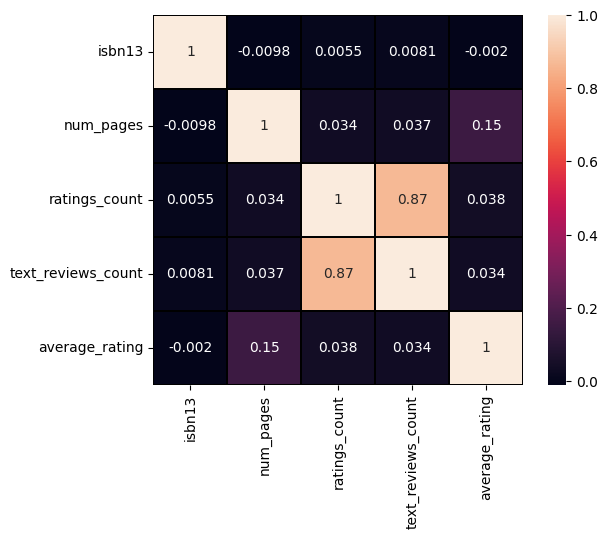

In [294]:
sns.heatmap(data=df.corr(),
            linewidths=0.25, square=True,
            linecolor="black", annot=True)

Text(0, 0.5, 'Frequency')

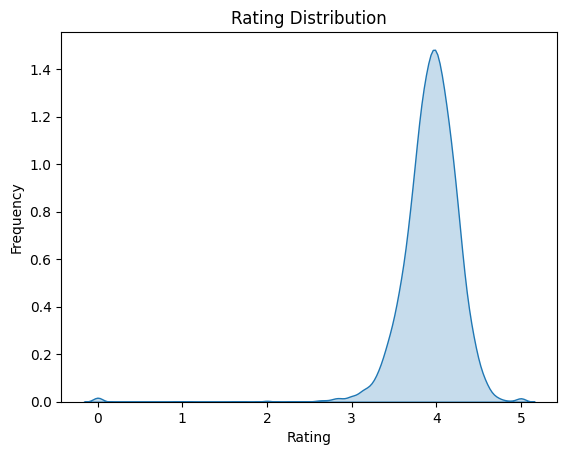

In [298]:
sns.kdeplot(df["average_rating"], fill=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

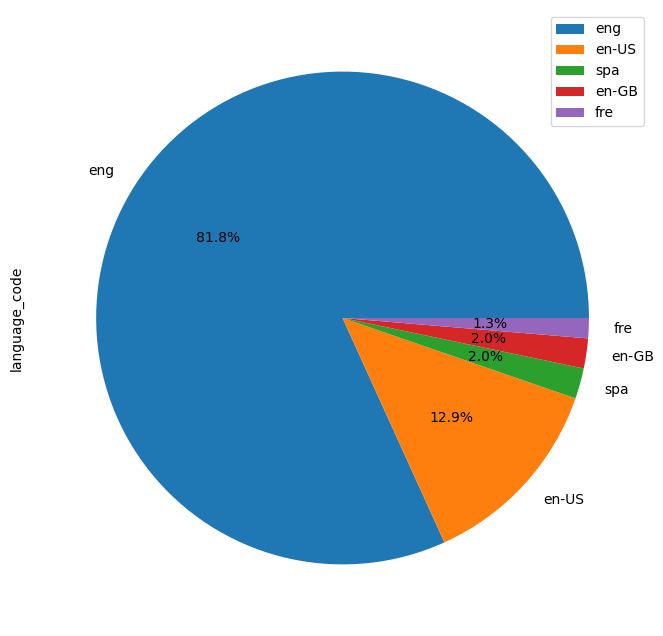

In [301]:
df['language_code'].value_counts().head().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '3.82'),
  Text(1, 0, '3.83'),
  Text(2, 0, '3.89'),
  Text(3, 0, '3.92'),
  Text(4, 0, '3.93'),
  Text(5, 0, '3.94'),
  Text(6, 0, '3.96'),
  Text(7, 0, '3.97'),
  Text(8, 0, '3.98'),
  Text(9, 0, '3.99'),
  Text(10, 0, '4.0'),
  Text(11, 0, '4.02'),
  Text(12, 0, '4.04'),
  Text(13, 0, '4.05'),
  Text(14, 0, '4.07')])

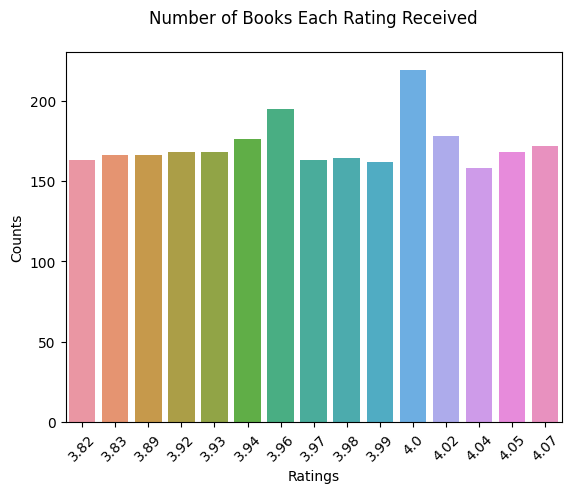

In [308]:
sns.barplot(data=df, x=df['average_rating'].value_counts().head(15).index, y=df['average_rating'].value_counts().head(15))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)


<AxesSubplot: xlabel='ratings_count', ylabel='title'>

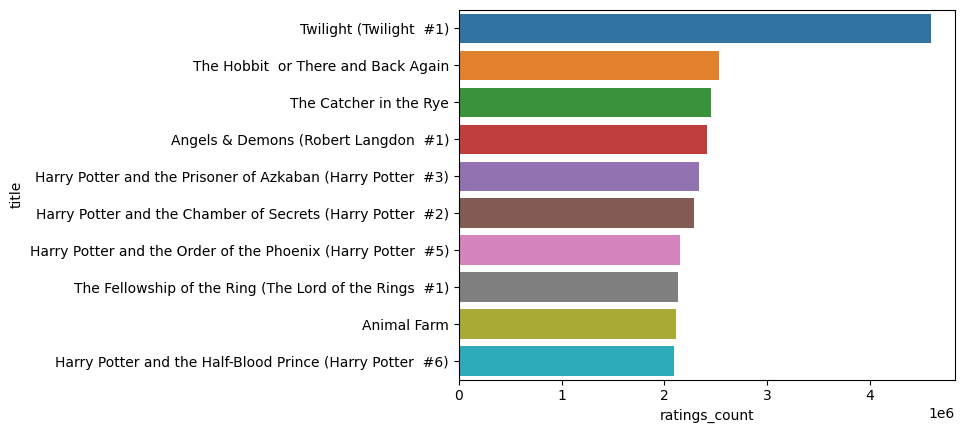

In [321]:
pop_books = df.nlargest(10, 'ratings_count').set_index('title')['ratings_count']
sns.barplot(x=pop_books, y=pop_books.index)

(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000., 2250000.]),
 [Text(0.0, 0, '0.00'),
  Text(250000.0, 0, '0.25'),
  Text(500000.0, 0, '0.50'),
  Text(750000.0, 0, '0.75'),
  Text(1000000.0, 0, '1.00'),
  Text(1250000.0, 0, '1.25'),
  Text(1500000.0, 0, '1.50'),
  Text(1750000.0, 0, '1.75'),
  Text(2000000.0, 0, '2.00'),
  Text(2250000.0, 0, '2.25')])

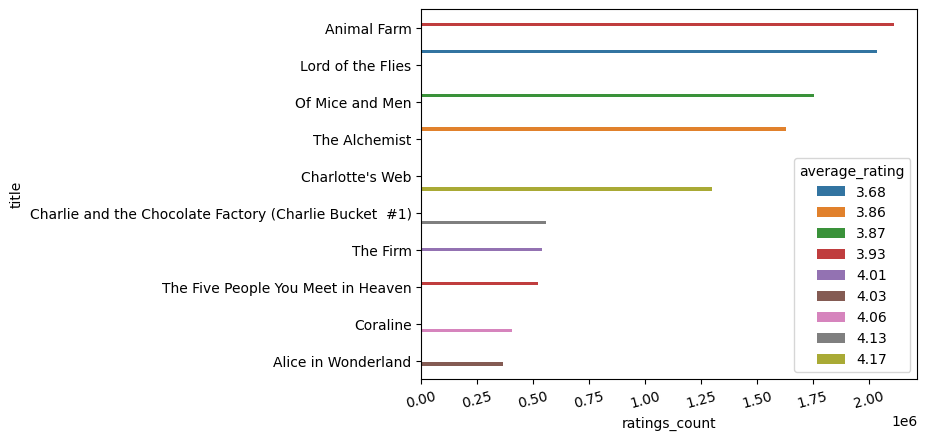

In [324]:
under200 = df[df['num_pages'] <= 200]
top10under200 = under200.nlargest(10, ['ratings_count'])
sns.barplot(x=top10under200['ratings_count'], y=top10under200['title'], hue=top10under200['average_rating'])
plt.xticks(rotation=15)

<AxesSubplot: xlabel='num_pages', ylabel='title'>

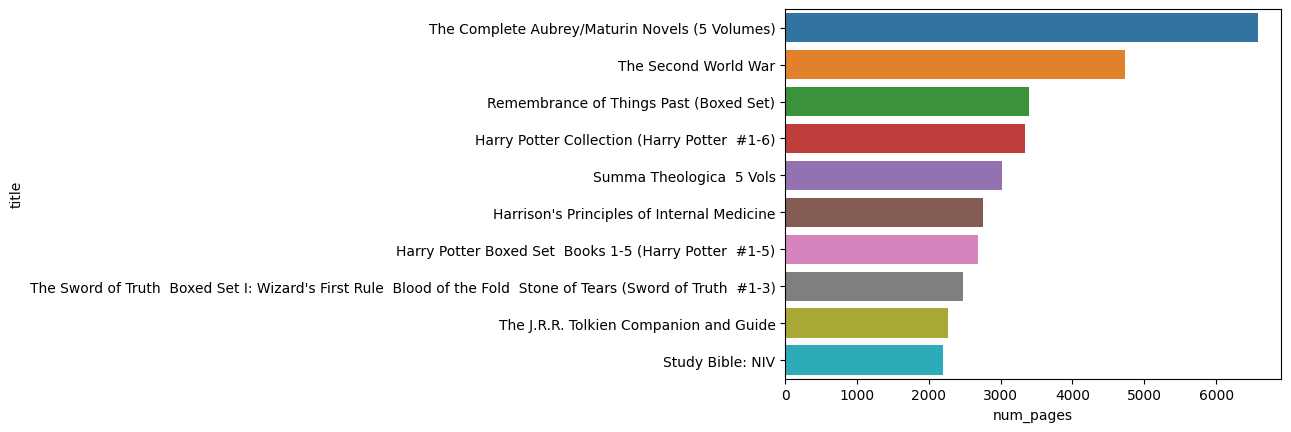

In [326]:
longest_books = df.nlargest(10, ['num_pages']).set_index('title')
sns.barplot(x=longest_books['num_pages'], y=longest_books.index)

/var/folders/dz/3jfgccdn52ggwvy9spwly7y00000gn/T/ipykernel_64743/1263337779.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0.5, 0, 'Total Ratings')

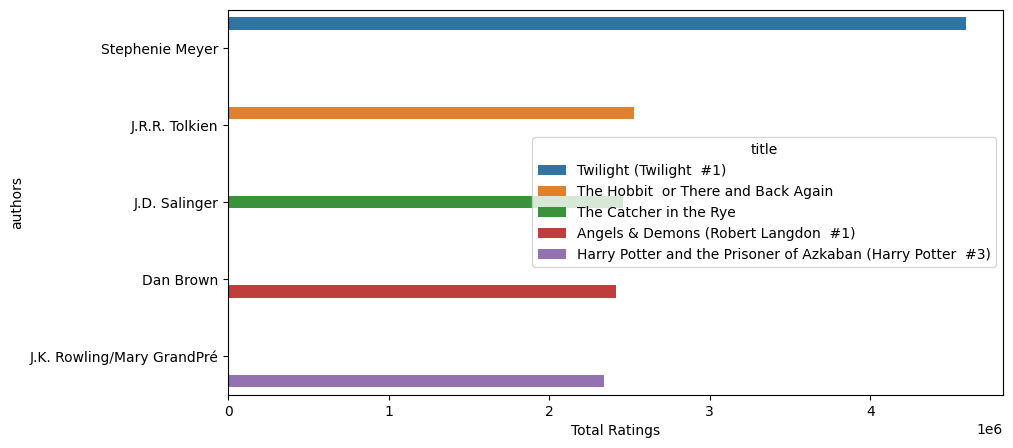

In [327]:
plt.figure(figsize=(10,5))
authors = df.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(x=authors['ratings_count'], y=authors.index, ci=None, hue=authors['title'])
plt.xlabel('Total Ratings')

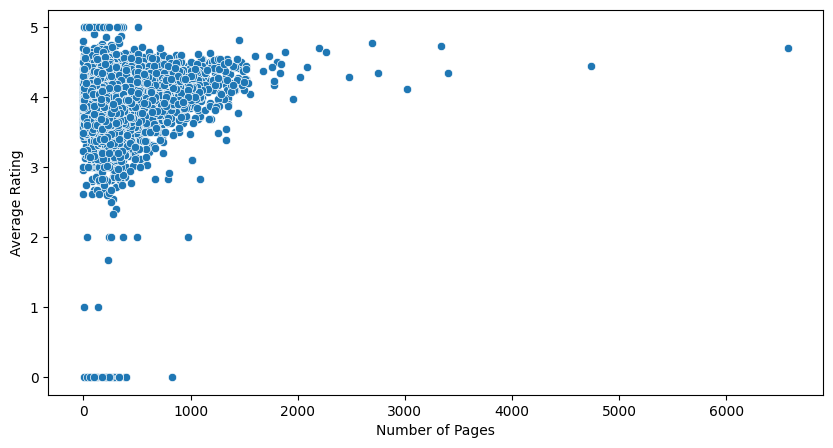

In [332]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'num_pages', y = 'average_rating', data = df)
plt.xlabel('Number of Pages')
plt.ylabel('Average Rating')
plt.show()

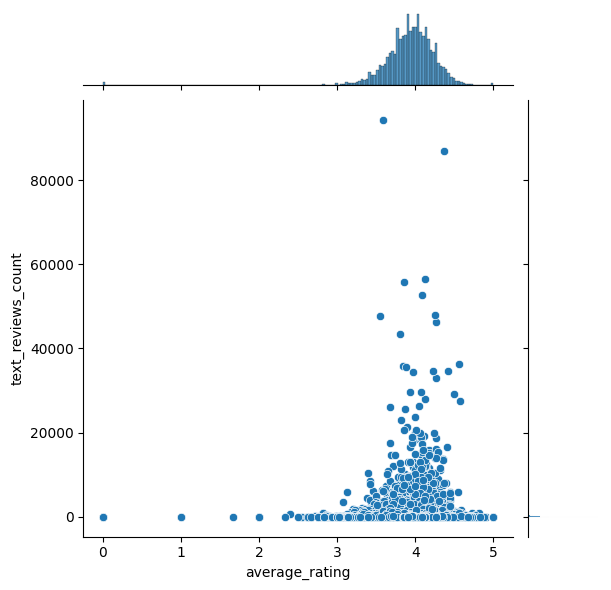

In [330]:
sns.jointplot(x='average_rating', y='text_reviews_count', data=df)

/var/folders/dz/3jfgccdn52ggwvy9spwly7y00000gn/T/ipykernel_64743/2322978874.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<function matplotlib.pyplot.show(close=None, block=None)>

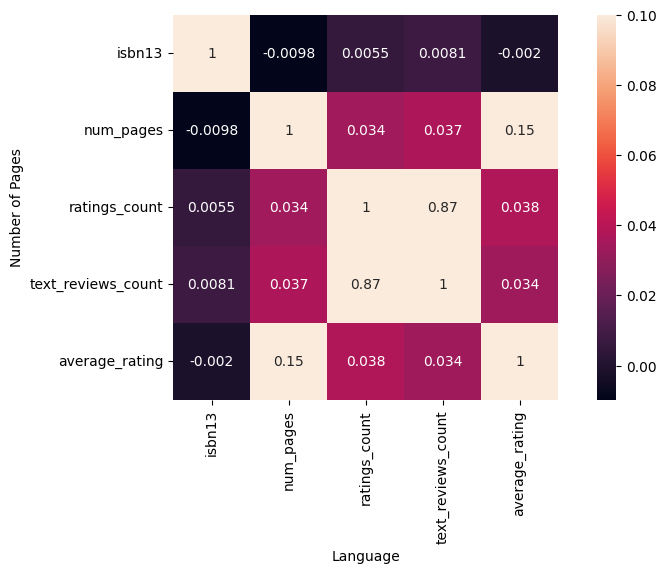

In [333]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), square=True, vmax=0.1, annot=True)
plt.xlabel('Language')
plt.ylabel('Number of Pages')
plt.show

training!

In [280]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [267]:
df_train, df_test = train_test_split(df_adj_l_a, test_size=0.2)

In [268]:
len(df_train)

8901

In [269]:
len(df_test)

2226

In [270]:
len(df_train.columns)

6678

In [271]:
print(df_adj_l.average_rating.mean())
print(df_train.average_rating.mean())
print(df_test.average_rating.mean())

3.9336308079446387
3.935780249410178
3.925035938903864


In [278]:
df_train.head(5)

,title,isbn,isbn13,publication_date,num_pages,ratings_count,text_reviews_count,ale,ara,en-CA,...,Émile Zola/Andrew Moore/Ernest Alfred Vizetelly,Émile Zola/Douglas Parmée,Émile Zola/Ernest Alfred Vizetelly,Émile Zola/Ernest Alfred Vizetelly/Henry Vizetelly,Émile Zola/Henri Mitterand,Émile Zola/Robert Lethbridge/Elinor Dorday,Émile Zola/Robin Buss/Brian Nelson,Émile Zola/Roger Pearson,Éric-Emmanuel Schmitt,average_rating
bookID,,,,,,,,,,,,,,,,,,,,,
12263,The Gray-Eyed Goddess (Tales from the Odyssey ...,0786809310,9780786809318,9/30/2003,128,316,22,0,0,0,...,0,0,0,0,0,0,0,0,0,4.09
11910,Mr. Sammler's Planet,0142437832,9780142437834,1/6/2004,288,2721,135,0,0,0,...,0,0,0,0,0,0,0,0,0,3.76
33075,In the Kitchen with Rosie: Oprah's Favorite Re...,0679434046,9780679434047,4/16/1994,142,767,31,0,0,0,...,0,0,0,0,0,0,0,0,0,3.04
33494,Secrets of San Francisco: A 1920s Sourcebook f...,1568821875,9781568821870,4/1/2006,189,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.86
4488,Bridget Jones's Guide to Life,0142000213,9780142000212,4/1/2001,64,1104,34,0,0,0,...,0,0,0,0,0,0,0,0,0,3.49


In [368]:
X_train = df_train.loc[:, df_train.columns[4:-1]].values
y_train = df_train.average_rating.values

In [369]:
X_test = df_test.loc[:, df_test.columns[4:-1]].values
y_test = df_test.average_rating.values

In [370]:
lr_model = LinearRegression()

In [371]:
lr_model.fit(X=X_train, y=y_train)

LinearRegression()

In [348]:
y_test_predict = lr_model.predict(X_test)

In [349]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_predict.tolist()}).head(25)
pred.head

<bound method NDFrame.head of     Actual  Predicted
0     3.59   3.803899
1     4.28   3.983548
2     3.72   4.026547
3     4.02   3.916854
4     3.92   3.950657
5     3.91   3.803770
6     4.25   4.162757
7     3.69   3.521473
8     3.90   3.873496
9     3.90   3.860592
10    3.75   3.893512
11    4.11   3.971562
12    4.30   4.199663
13    4.05   4.411904
14    3.97   3.891917
15    3.83   3.957206
16    3.68   3.800543
17    3.84   3.841947
18    4.03   3.834802
19    3.68   4.016558
20    4.15   3.859687
21    4.20   4.075072
22    3.98   3.925174
23    4.14   3.980865
24    3.69   3.986166>

<AxesSubplot: >

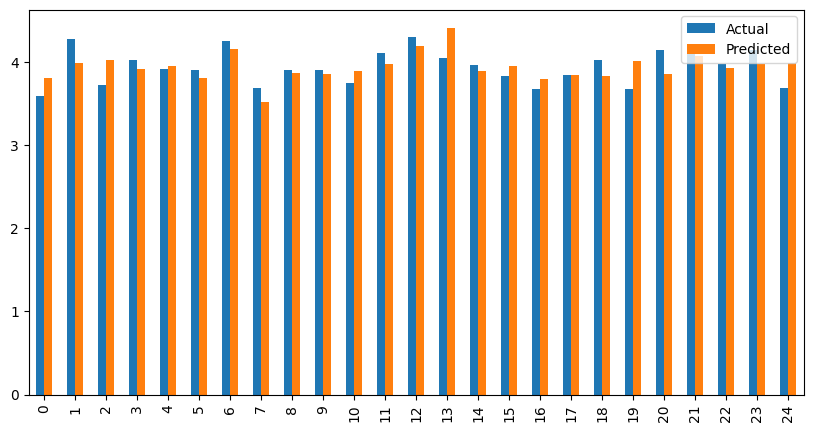

In [290]:
pred.plot(kind='bar', figsize=(10, 5))

In [353]:
from sklearn.metrics import r2_score, mean_squared_error

In [388]:
r2_score_1 = r2_score(y_test, y_test_predict)
r2_score_1

0.09698751910364634

In [474]:
mse_1 = mean_squared_error(y_test, y_test_predict)
mse_1

0.12028063250678347

Random Forest Model

In [344]:
df_adj_l_a

,title,isbn,isbn13,publication_date,num_pages,ratings_count,text_reviews_count,ale,ara,en-CA,...,Émile Zola/Andrew Moore/Ernest Alfred Vizetelly,Émile Zola/Douglas Parmée,Émile Zola/Ernest Alfred Vizetelly,Émile Zola/Ernest Alfred Vizetelly/Henry Vizetelly,Émile Zola/Henri Mitterand,Émile Zola/Robert Lethbridge/Elinor Dorday,Émile Zola/Robin Buss/Brian Nelson,Émile Zola/Roger Pearson,Éric-Emmanuel Schmitt,average_rating
bookID,,,,,,,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,0439785960,9780439785969,9/16/2006,652,2095690,27591,0,0,0,...,0,0,0,0,0,0,0,0,0,4.57
2,Harry Potter and the Order of the Phoenix (Har...,0439358078,9780439358071,9/1/2004,870,2153167,29221,0,0,0,...,0,0,0,0,0,0,0,0,0,4.49
4,Harry Potter and the Chamber of Secrets (Harry...,0439554896,9780439554893,11/1/2003,352,6333,244,0,0,0,...,0,0,0,0,0,0,0,0,0,4.42
5,Harry Potter and the Prisoner of Azkaban (Harr...,043965548X,9780439655484,5/1/2004,435,2339585,36325,0,0,0,...,0,0,0,0,0,0,0,0,0,4.56
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,0439682584,9780439682589,9/13/2004,2690,41428,164,0,0,0,...,0,0,0,0,0,0,0,0,0,4.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,1560254416,9781560254416,12/21/2004,512,156,20,0,0,0,...,0,0,0,0,0,0,0,0,0,4.06
45633,You Bright and Risen Angels,0140110879,9780140110876,12/1/1988,635,783,56,0,0,0,...,0,0,0,0,0,0,0,0,0,4.08
45634,The Ice-Shirt (Seven Dreams #1),0140131965,9780140131963,8/1/1993,415,820,95,0,0,0,...,0,0,0,0,0,0,0,0,0,3.96


In [347]:
df.groupby('language_code')['title'].agg(['count'])

,count
language_code,
ale,1
ara,1
en-CA,7
en-GB,214
en-US,1409
eng,8911
enm,3
fre,144
ger,99


leave lang and author aside

In [377]:
X_train_2 = df_train.loc[:, ["num_pages", "ratings_count", "text_reviews_count"]].values
y_train_2 = df_train.average_rating.values

In [378]:
X_test_2 = df_test.loc[:, ["num_pages", "ratings_count", "text_reviews_count"]].values
y_test_2 = df_test.average_rating.values

In [379]:
lr_model_2 = LinearRegression()

In [380]:
lr_model_2.fit(X=X_train_2, y=y_train_2)

LinearRegression()

In [381]:
y_test_pred_2 = lr_model_2.predict(X_test_2)

In [384]:
pred_2 = pd.DataFrame({'Actual': y_test_2.tolist(), 'Predicted': y_test_pred_2.tolist()}).head(25)

<AxesSubplot: >

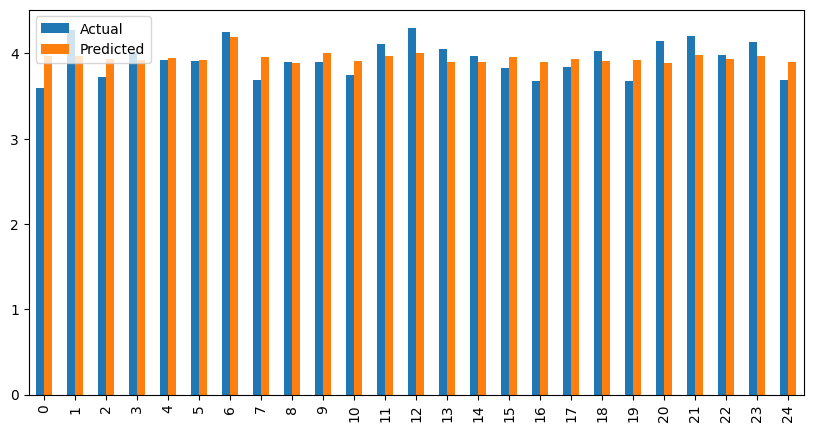

In [385]:
pred_2.plot(kind='bar', figsize=(10, 5))

In [387]:
r2_score_2 = r2_score(y_test_2, y_test_pred_2)
r2_score_2

0.029173623768375623

In [389]:
mse_2 = mean_squared_error(y_test_2, y_test_pred_2)
mse_2

0.12931339605793463

**attemp 3**
num_pages, ratings_count, text_reviews_count + author

In [401]:
df.groupby("language_code").count().shape

(27, 9)

In [404]:
df_train.columns[7:34]

Index(['ale', 'ara', 'en-CA', 'en-GB', 'en-US', 'eng', 'enm', 'fre', 'ger',
       'gla', 'glg', 'grc', 'ita', 'jpn', 'lat', 'msa', 'mul', 'nl', 'nor',
       'por', 'rus', 'spa', 'srp', 'swe', 'tur', 'wel', 'zho'],
      dtype='object')

In [437]:
rng_tmp = list(range(4,7)) + list(range(34, len(df_train.columns)-1))
df_train.iloc[:, rng_tmp[-1]]

bookID
12263    0
11910    0
33075    0
33494    0
4488     0
        ..
33539    0
10096    0
45121    0
16180    0
5812     0
Name: Éric-Emmanuel Schmitt, Length: 8901, dtype: uint8

In [438]:

X_train_3 = df_train.iloc[:, rng_tmp].values
y_train_3 = df_train.average_rating.values


In [439]:
X_test_3 = df_test.iloc[:, rng_tmp].values
y_test_3 = df_test.average_rating.values

In [440]:
lr_model_3 = LinearRegression()

In [446]:
lr_model_3.fit(X=X_train_3, y=y_train_3)

LinearRegression()

In [450]:
y_test_pred_3 = lr_model_3.predict(X_test_3)
y_test_pred_3

array([3.81438708e+00, 8.50833341e+04, 3.99011901e+00, ...,
       3.98030366e+00, 1.10206254e+02, 1.10400446e+02])

<AxesSubplot: >

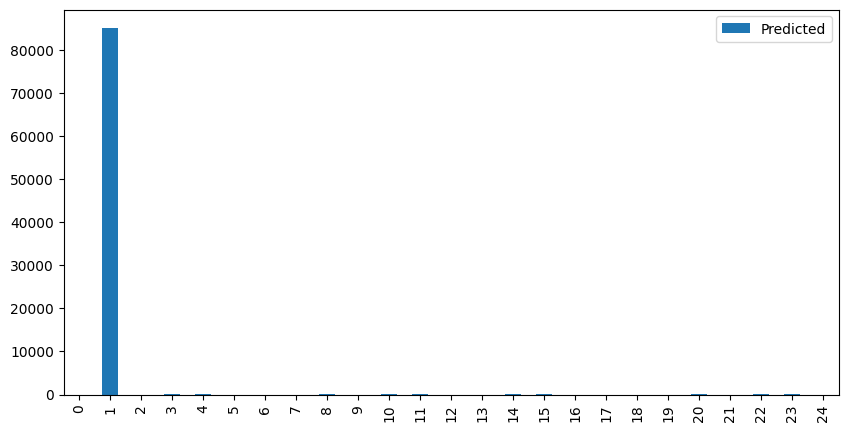

In [456]:
pd.DataFrame({'Predicted': y_test_pred_3.tolist()}).head(25).plot(kind='bar', figsize=(10,5))

In [451]:
y_test_3

array([3.59, 4.28, 3.72, ..., 4.21, 3.82, 3.93])

In [448]:
pred_3 = pd.DataFrame({'Actual': y_test_3.tolist(), 'Predicted': y_test_pred_3.tolist()}).head(25)

<AxesSubplot: >

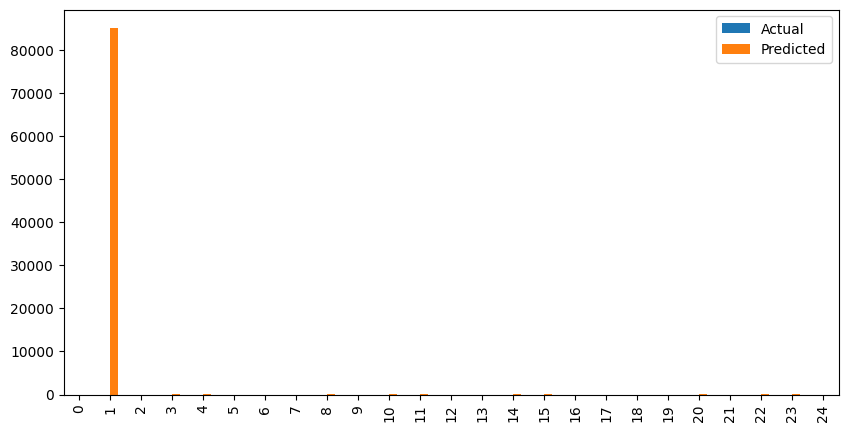

In [449]:
pred_3.plot(kind='bar', figsize=(10, 5))

In [445]:
r2_score_3 = r2_score(y_test_3, y_test_pred_3)
r2_score_3

-2242408888.647467

In [434]:
mse_3 = mean_squared_error(y_test_3, y_test_pred_3)
mse_3

1.841394519358056e-24

**attemp 4**
num_pages, ratings_count, text_reviews_count + lang

In [458]:
X_train_4 = df_train.iloc[:, 4:34].values
y_train_4 = df_train.average_rating.values

In [459]:
X_test_4 = df_test.iloc[:, 4:34].values
y_test_4 = df_test.average_rating.values

In [461]:
lr_model_4 = LinearRegression()

In [462]:
lr_model_4.fit(X=X_train_4, y=y_train_4)

LinearRegression()

In [463]:
y_test_pred_4 = lr_model_4.predict(X_test_4)
y_test_pred_4

array([3.97026132, 3.97607734, 3.92279149, ..., 3.86255763, 3.86471437,
       4.00444624])

In [466]:
pred_4 = pd.DataFrame({'Actual': y_test_4.tolist(), 'Predicted': y_test_pred_4.tolist()}).head(25)

<AxesSubplot: >

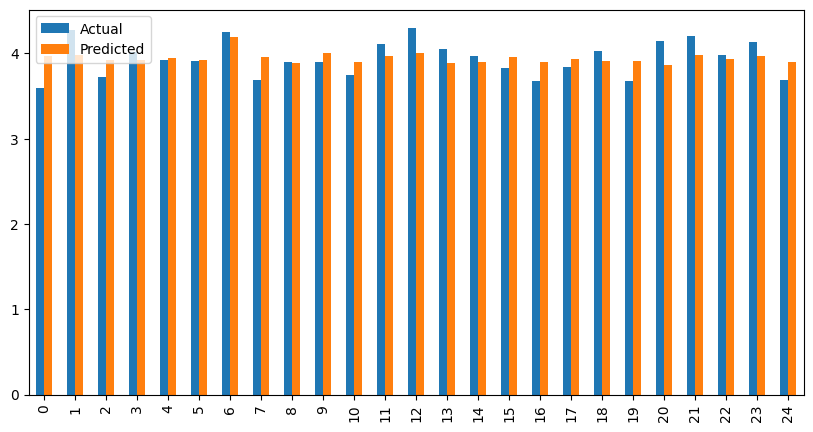

In [467]:
pred_4.plot(kind='bar', figsize=(10, 5))

In [468]:
r2_score_4 = r2_score(y_test_4, y_test_pred_4)
r2_score_4

0.030831810384437164

In [469]:
mse_4 = mean_squared_error(y_test_4, y_test_pred_4)
mse_4

0.12909252675743926

In [472]:
print(r2_score_1, r2_score_2, r2_score_3, r2_score_4)

0.09698751910364634 0.029173623768375623 -2242408888.647467 0.030831810384437164


In [475]:
print(mse_1, mse_2, mse_3, mse_4)

0.12028063250678347 0.12931339605793463 1.841394519358056e-24 0.12909252675743926
